In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from yahoo_fin import options
from datetime import datetime
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from tensorflow.keras import optimizers
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.stats import uniform, truncnorm, randint
from keras.wrappers.scikit_learn import KerasRegressor

style.use("ggplot")

#chain = options.get_options_chain("TSLA", '03/20/2020')

#data = pd.DataFrame(chain['calls'])
#data1 = pd.DataFrame(chain['puts'])
#maturities = data.iloc[:, 1]
#strike = data.iloc[:,2]
#volatilities = data.iloc[:,10]

dataset = pd.read_csv('C:/Users/andre/Desktop/Financial Modeling/Data/Calls/allCalls.csv')
dataset = dataset.loc[dataset['Implied Volatility'] != 0]
maturities = dataset['Maturity']
strikes = dataset['Strike']
volatilities = dataset["Implied Volatility"]

In [2]:
maturities = maturities.to_numpy()
strikes = strikes.to_numpy()
volatilities = volatilities.to_numpy()



In [3]:
strikes = strikes
maturities = maturities
volatilities = volatilities
volatilities.shape

(3307,)

In [4]:
inputs = []
for i in range(maturities.size):
    inputs.append([maturities[i],strikes[i]])
inputs

[[10, 320.0],
 [10, 325.0],
 [10, 330.0],
 [10, 335.0],
 [10, 340.0],
 [10, 345.0],
 [10, 350.0],
 [10, 355.0],
 [10, 370.0],
 [10, 375.0],
 [10, 380.0],
 [10, 385.0],
 [10, 390.0],
 [10, 395.0],
 [10, 400.0],
 [10, 405.0],
 [10, 410.0],
 [10, 415.0],
 [10, 420.0],
 [10, 425.0],
 [10, 430.0],
 [10, 435.0],
 [10, 440.0],
 [10, 445.0],
 [10, 450.0],
 [10, 455.0],
 [10, 460.0],
 [10, 465.0],
 [10, 470.0],
 [10, 475.0],
 [10, 480.0],
 [10, 485.0],
 [10, 490.0],
 [10, 495.0],
 [10, 500.0],
 [10, 510.0],
 [10, 520.0],
 [10, 530.0],
 [10, 540.0],
 [10, 542.5],
 [10, 545.0],
 [10, 547.5],
 [10, 550.0],
 [10, 552.5],
 [10, 555.0],
 [10, 557.5],
 [10, 560.0],
 [10, 562.5],
 [10, 565.0],
 [10, 567.5],
 [10, 570.0],
 [10, 572.5],
 [10, 575.0],
 [10, 577.5],
 [10, 580.0],
 [10, 582.5],
 [10, 585.0],
 [10, 587.5],
 [10, 590.0],
 [10, 592.5],
 [10, 595.0],
 [10, 597.5],
 [10, 600.0],
 [10, 602.5],
 [10, 605.0],
 [10, 607.5],
 [10, 610.0],
 [10, 612.5],
 [10, 615.0],
 [10, 617.5],
 [10, 620.0],
 [10, 

Text(0.5, 0, 'Volatility')

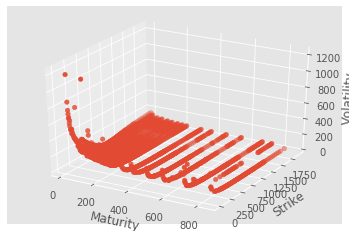

In [5]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(maturities, strikes, volatilities)
threedee.set_xlabel('Maturity')
threedee.set_ylabel('Strike')
threedee.set_zlabel('Volatility')

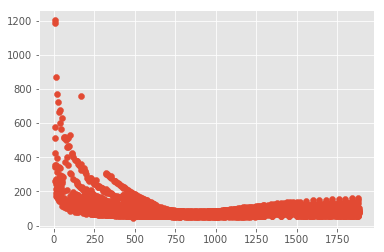

In [6]:
plt.scatter(strikes, volatilities)


In [256]:
inputs1 = inputs
volatilities1 = volatilities

In [257]:
 X_train, X_test, Y_train, Y_test = train_test_split(inputs1, volatilities1, test_size=0.20, random_state=42)

In [258]:
X_train = np.asarray(X_train)
X_train.shape

(2645, 2)

In [259]:
Y_train = np.asarray(Y_train)
Y_train.shape
Y_train

array([125.67,  59.21,  48.38, ...,  79.31,  80.04,  57.12])

In [260]:
Y_test = np.asarray(Y_test)
Y_test.shape

(662,)

In [261]:
X_test = np.asarray(X_test)
X_test.shape

(662, 2)

In [262]:
model = Sequential()
model.add(layers.Dense(256, input_dim=2, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(256, activation='linear'))
model.add(layers.Dense(1))

In [263]:
# compiling the sequential model
model.compile(loss='mean_squared_error', optimizer='adam')

In [264]:
history = model.fit(X_train, Y_train,
          batch_size=300, epochs=300,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 2645 samples, validate on 662 samples
Epoch 1/300
2645/2645 - 1s - loss: 11927.3331 - val_loss: 7587.6990
Epoch 2/300
2645/2645 - 0s - loss: 7572.0801 - val_loss: 7703.0122
Epoch 3/300
2645/2645 - 0s - loss: 7487.2459 - val_loss: 7440.6587
Epoch 4/300
2645/2645 - 0s - loss: 7462.5399 - val_loss: 7392.1712
Epoch 5/300
2645/2645 - 0s - loss: 7482.5614 - val_loss: 7447.3534
Epoch 6/300
2645/2645 - 0s - loss: 7441.1054 - val_loss: 7442.0406
Epoch 7/300
2645/2645 - 0s - loss: 7400.9338 - val_loss: 7385.7679
Epoch 8/300
2645/2645 - 0s - loss: 7361.4602 - val_loss: 7266.3025
Epoch 9/300
2645/2645 - 0s - loss: 7300.1309 - val_loss: 7384.5023
Epoch 10/300
2645/2645 - 0s - loss: 7281.7745 - val_loss: 7291.4607
Epoch 11/300
2645/2645 - 0s - loss: 7280.5691 - val_loss: 7166.1511
Epoch 12/300
2645/2645 - 0s - loss: 7278.6670 - val_loss: 7198.4403
Epoch 13/300
2645/2645 - 0s - loss: 7207.9162 - val_loss: 7141.7811
Epoch 14/300
2645/2645 - 0s - loss: 7143.1691 - val_loss: 7265.1025
Epoch 15/

Epoch 124/300
2645/2645 - 0s - loss: 197.8278 - val_loss: 584.9918
Epoch 125/300
2645/2645 - 0s - loss: 207.1487 - val_loss: 465.3784
Epoch 126/300
2645/2645 - 0s - loss: 226.3523 - val_loss: 679.5305
Epoch 127/300
2645/2645 - 0s - loss: 216.7098 - val_loss: 569.9547
Epoch 128/300
2645/2645 - 0s - loss: 208.2388 - val_loss: 808.9564
Epoch 129/300
2645/2645 - 0s - loss: 237.1794 - val_loss: 332.6276
Epoch 130/300
2645/2645 - 0s - loss: 237.0481 - val_loss: 902.3020
Epoch 131/300
2645/2645 - 0s - loss: 247.0224 - val_loss: 661.5421
Epoch 132/300
2645/2645 - 0s - loss: 246.8781 - val_loss: 657.9268
Epoch 133/300
2645/2645 - 0s - loss: 205.8719 - val_loss: 788.6800
Epoch 134/300
2645/2645 - 1s - loss: 218.8188 - val_loss: 645.2291
Epoch 135/300
2645/2645 - 0s - loss: 218.1983 - val_loss: 688.4646
Epoch 136/300
2645/2645 - 1s - loss: 208.4796 - val_loss: 812.5362
Epoch 137/300
2645/2645 - 1s - loss: 221.7638 - val_loss: 642.3061
Epoch 138/300
2645/2645 - 0s - loss: 243.8779 - val_loss: 748.

Epoch 247/300
2645/2645 - 0s - loss: 198.1633 - val_loss: 557.8541
Epoch 248/300
2645/2645 - 0s - loss: 207.8737 - val_loss: 544.4667
Epoch 249/300
2645/2645 - 0s - loss: 194.6755 - val_loss: 492.7587
Epoch 250/300
2645/2645 - 0s - loss: 187.8820 - val_loss: 507.3750
Epoch 251/300
2645/2645 - 0s - loss: 180.1405 - val_loss: 480.3098
Epoch 252/300
2645/2645 - 0s - loss: 194.4822 - val_loss: 562.3612
Epoch 253/300
2645/2645 - 0s - loss: 196.9827 - val_loss: 508.1203
Epoch 254/300
2645/2645 - 0s - loss: 214.7060 - val_loss: 668.2446
Epoch 255/300
2645/2645 - 0s - loss: 236.9478 - val_loss: 463.4013
Epoch 256/300
2645/2645 - 0s - loss: 206.7943 - val_loss: 477.3530
Epoch 257/300
2645/2645 - 0s - loss: 192.7371 - val_loss: 508.6965
Epoch 258/300
2645/2645 - 0s - loss: 208.4099 - val_loss: 396.0181
Epoch 259/300
2645/2645 - 0s - loss: 236.5669 - val_loss: 857.2330
Epoch 260/300
2645/2645 - 0s - loss: 236.0479 - val_loss: 671.4213
Epoch 261/300
2645/2645 - 0s - loss: 216.9632 - val_loss: 608.

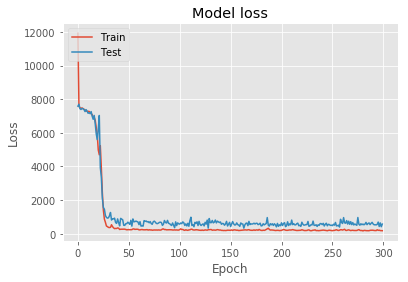

In [265]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [186]:
""" Attempt at Grid Search
max_depth = [32, 64, 128, 256, 512]
batch_size = [32,64,128]

model_params = {
    'max_depth': max_depth, 'batch_size': batch_size
}

model_tuned = GridSearchCV(estimator = model, param_grid = model_params, cv = 2, verbose=0, n_jobs = -1, scoring = 'neg_log_loss')
model2 = model_tuned.fit(X_train, Y_train)

"""

"\nmax_depth = [32, 64, 128, 256, 512]\nbatch_size = [32,64,128]\n\nmodel_params = {\n    'max_depth': max_depth, 'batch_size': batch_size\n}\n\nmodel_tuned = GridSearchCV(estimator = model, param_grid = model_params, cv = 2, verbose=0, n_jobs = -1, scoring = 'neg_log_loss')\nmodel2 = model_tuned.fit(X_train, Y_train)\n\n"

In [266]:
ymin = 10
ymax = 800
yinc = 10

xmin = 350
xmax = 2000
xinc = 25

X = np.arange(xmin, xmax, xinc)
Y = np.arange(ymin, ymax, yinc)

X, Y = np.meshgrid(X, Y)

x = np.ndarray.flatten(X)
y = np.ndarray.flatten(Y)
xtest = np.stack((x, y), axis=-1)

In [267]:
predict = model.predict(xtest)

# pred = np.ndarray.squeeze(predict, axis=1)
pred = np.reshape(predict, (int((ymax-ymin)/yinc),int((xmax-xmin)/xinc)))

print(pred)


[[285.5324   275.77505  269.2097   ... 303.29797  304.58044  305.87482 ]
 [238.64243  233.16699  227.85849  ... 227.29906  229.42664  231.54138 ]
 [220.83368  216.08307  208.56091  ... 190.9425   191.85428  192.76309 ]
 ...
 [ 65.642105  64.621086  63.855846 ...  57.38812   57.80823   58.0742  ]
 [ 65.60481   64.59662   63.80086  ...  56.988586  57.46232   57.883602]
 [ 65.570755  64.57461   63.770367 ...  56.743237  57.062855  57.53652 ]]


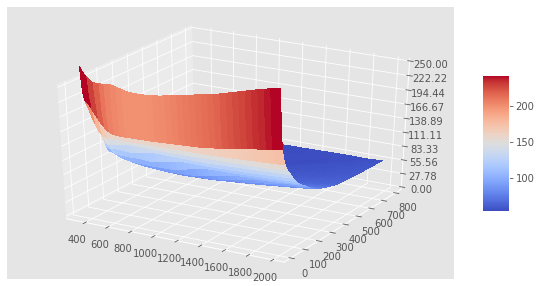

In [268]:
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.gca(projection='3d')

surf1 = ax1.plot_surface(X, Y, pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax1.set_zlim(0, 250)
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig1.colorbar(surf1, shrink=0.5, aspect=5)
